In [27]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fpath = "./dataset"

### 복습

In [2]:
## DataFrame 만들기

exam_data = {
    "수학":[90,80,70],
    "영어":[90.,70.,90.],
    "성별":["남","여","남"],
    "합격":[True,False,True]
}

exam_df = pd.DataFrame(exam_data)
exam_df

,수학,영어,성별,합격
0,90,90.0,남,True
1,80,70.0,여,False
2,70,90.0,남,True


In [5]:
## Attributes

exam_df.shape      #행,열
exam_df.columns    #columns의 이름
exam_df.dtypes     #데이터 타입 (object = str)
exam_df.info()     #전체적인 정보


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수학      3 non-null      int64  
 1   영어      3 non-null      float64
 2   성별      3 non-null      object 
 3   합격      3 non-null      bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 207.0+ bytes


In [8]:
## Summary statistic

print(exam_df["수학"].mean())
print(exam_df["수학"].median())
print(exam_df["수학"].std())
print(exam_df["수학"].var())
print(exam_df["수학"].sem())
print(exam_df["수학"].min())
print(exam_df["수학"].max())

print(exam_df["수학"].describe())    #위의 특성을 한번에 확인할 수 있음

80.0
80.0
10.0
100.0
5.773502691896258
70
90
count     3.0
mean     80.0
std      10.0
min      70.0
25%      75.0
50%      80.0
75%      85.0
max      90.0
Name: 수학, dtype: float64


## seaborn으로 파일 가져오기

In [13]:
## sns - load

print(sns.get_dataset_names())
tips = sns.load_dataset("tips")
print(tips.head())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


correlation = 
             total_bill       tip
total_bill    1.000000  0.675734
tip           0.675734  1.000000


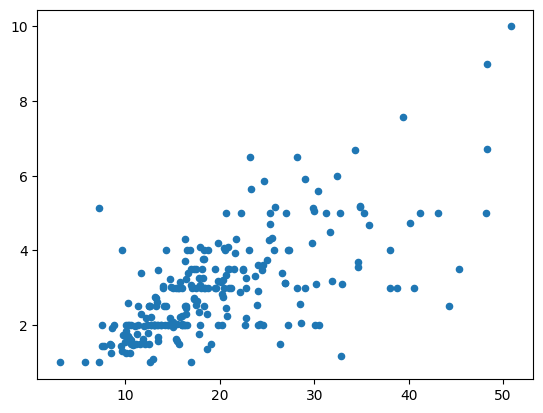

In [22]:
## correlation
print("correlation = \n", tips[["total_bill","tip"]].corr())

plt.scatter(tips["total_bill"],tips["tip"], s = 20)
plt.show()

## csv 파일 불러오기

In [28]:
## excel

fname = "cars.csv"
file = os.path.join(fpath, fname)

## csv
cars_df = pd.read_csv(file)
cars_df.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


## 엑셀 불러오기

In [29]:
## excel

fname = "vor_r.xlsx"
file = os.path.join(fpath, fname)
vor_df = pd.read_excel(file)         #"./dataset/vor_r.xlsx"
vor_df.head()

,group,id,time,hz0.04,hz0.08,hz0.1,hz0.16,hz0.32,hz0.64,hz1
0,1,1,Pre,0.213840,0.717955,0.848727,0.850790,0.802738,0.808393,0.738967
1,1,2,Pre,0.345725,0.795440,0.781473,0.924972,0.801245,0.803880,0.781420
2,1,3,Pre,0.376285,0.799327,0.781350,0.777773,0.868007,0.868853,0.754252
3,1,4,Pre,0.451440,0.771083,0.808645,0.787825,0.839985,0.832352,0.818722
4,1,5,Pre,0.287360,0.825547,0.831303,0.818332,0.817320,0.816153,0.836298


## merage_groupby

In [31]:
df1 = pd.DataFrame({'a': ['a0', 'a1', 'a2', 'a3'],
                    'b': ['b0', 'b1', 'b2', 'b3'],
                    'c': ['c0', 'c1', 'c2', 'c3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'a': ['a2', 'a3', 'a4', 'a5'],
                    'b': ['b2', 'b3', 'b4', 'b5'],
                    'c': ['c2', 'c3', 'c4', 'c5'],
                    'd': ['d2', 'd3', 'd4', 'd5']},
                    index=[2, 3, 4, 5])

print("df1 = \n", df1)
print("df2 = \n", df2)

df1 = 
     a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3
df2 = 
     a   b   c   d
2  a2  b2  c2  d2
3  a3  b3  c3  d3
4  a4  b4  c4  d4
5  a5  b5  c5  d5


## concat으로 조인

In [44]:
## concatenation : 병합
## 행 방향으로 병합 : 컬럼 이름과 같을 때

concat_row = pd.concat([df1, df2], join = "inner", ignore_index= True)  #join : outer, inner 조인
print("pd.concat([df1,df2]) = \n",concat_row)

pd.concat([df1,df2]) = 
     a   b   c
0  a0  b0  c0
1  a1  b1  c1
2  a2  b2  c2
3  a3  b3  c3
4  a2  b2  c2
5  a3  b3  c3
6  a4  b4  c4
7  a5  b5  c5


In [45]:
# 열 방향으로 병합 : 인덱스 기준 병합

concat_col = pd.concat([df1, df2], axis = 1)
print(concat_col)

     a    b    c    a    b    c    d
0   a0   b0   c0  NaN  NaN  NaN  NaN
1   a1   b1   c1  NaN  NaN  NaN  NaN
2   a2   b2   c2   a2   b2   c2   d2
3   a3   b3   c3   a3   b3   c3   d3
4  NaN  NaN  NaN   a4   b4   c4   d4
5  NaN  NaN  NaN   a5   b5   c5   d5


## join으로 조인하기

In [64]:
df1 = pd.read_excel("./dataset/stock price.xlsx")
df2 = pd.read_excel("./dataset/stock valuation.xlsx")

df1.set_index("id", inplace=True)   #인덱스를 id로 수정
df2.set_index("id", inplace=True)   #인덱스를 id로 수정

print("df1 = \n",df1)
print()
print("df2 = \n",df2)


df1 = 
        stock_name          value   price
id                                      
128940       한미약품   59385.666667  421000
130960     CJ E&M   58540.666667   98900
138250      엔에스쇼핑   14558.666667   13200
139480        이마트  239230.833333  254500
142280     녹십자엠에스     468.833333   10200
145990        삼양사   82750.000000   82000
185750        종근당   40293.666667  100500
192400      쿠쿠홀딩스  179204.666667  177500
199800         툴젠   -2514.333333  115400
204210     모두투어리츠    3093.333333    3475

df2 = 
              name           eps     bps        per       pbr
id                                                          
130960     CJ E&M   6301.333333   54068  15.695091  1.829178
136480         하림    274.166667    3551  11.489362  0.887074
138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
139480        이마트  18268.166667  295780  13.931338  0.860437
145990        삼양사   5741.000000  108090  14.283226  0.758627
161390      한국타이어   5648.500000   51341   7.453306  0.820007
181

In [72]:
df3 = df1.join(df2, lsuffix = "x", rsuffix = "y", how = "inner")
df4 = df2.join(df1, how = "inner")

print("df3 = \n",df3)
print()
print("df4 = \n",df4)

df3 = 
        stock_name          value   price    name           eps     bps  \
id                                                                       
130960     CJ E&M   58540.666667   98900  CJ E&M   6301.333333   54068   
139480        이마트  239230.833333  254500     이마트  18268.166667  295780   
145990        삼양사   82750.000000   82000     삼양사   5741.000000  108090   
185750        종근당   40293.666667  100500     종근당   3990.333333   40684   
204210     모두투어리츠    3093.333333    3475  모두투어리츠     85.166667    5335   

              per       pbr  
id                           
130960  15.695091  1.829178  
139480  13.931338  0.860437  
145990  14.283226  0.758627  
185750  25.185866  2.470259  
204210  40.802348  0.651359  

df4 = 
           name           eps     bps        per       pbr stock_name  \
id                                                                     
130960  CJ E&M   6301.333333   54068  15.695091  1.829178     CJ E&M   
139480     이마트  18268.166667  295780  

## Merge로 조인하기

In [74]:
df1 = pd.read_excel("./dataset/stock price.xlsx")
df2 = pd.read_excel("./dataset/stock valuation.xlsx")

print("df1 = \n",df1)
print()
print("df2 = \n",df2)

df1 = 
        id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200
5  145990        삼양사   82750.000000   82000
6  185750        종근당   40293.666667  100500
7  192400      쿠쿠홀딩스  179204.666667  177500
8  199800         툴젠   -2514.333333  115400
9  204210     모두투어리츠    3093.333333    3475

df2 = 
        id       name           eps     bps        per       pbr
0  130960     CJ E&M   6301.333333   54068  15.695091  1.829178
1  136480         하림    274.166667    3551  11.489362  0.887074
2  138040    메리츠금융지주   2122.333333   14894   6.313806  0.899691
3  139480        이마트  18268.166667  295780  13.931338  0.860437
4  145990        삼양사   5741.000000  108090  14.283226  0.758627
5  161390      한국타이어   5648.500000   51341   7.453306  0.820007
6  181710  NHN엔터테인먼트   2110.166667   78434  30.7558

In [88]:
##merge

merge_inner = pd.merge(df1, df2, how = "inner", on = "id")  #on : id기준 조인
#print("merge inner = \n",merge_inner)

#print("*"*100)

merge_outer = pd.merge(df1, df2, how = "outer", on = "id")  
#print("merge outer = \n",merge_outer)

## left_on의 stock_name 과 right_on의 name에서 같은 것을 병합하겠음
merge_df2 = pd.merge(df1, df2, how = "left", left_on = "stock_name", right_on = "name")
print("merge_df2 = \n", merge_df2)


merge_df2 = 
      id_x stock_name          value   price      id_y    name           eps  \
0  128940       한미약품   59385.666667  421000       NaN     NaN           NaN   
1  130960     CJ E&M   58540.666667   98900  130960.0  CJ E&M   6301.333333   
2  138250      엔에스쇼핑   14558.666667   13200       NaN     NaN           NaN   
3  139480        이마트  239230.833333  254500  139480.0     이마트  18268.166667   
4  142280     녹십자엠에스     468.833333   10200       NaN     NaN           NaN   
5  145990        삼양사   82750.000000   82000  145990.0     삼양사   5741.000000   
6  185750        종근당   40293.666667  100500  185750.0     종근당   3990.333333   
7  192400      쿠쿠홀딩스  179204.666667  177500       NaN     NaN           NaN   
8  199800         툴젠   -2514.333333  115400       NaN     NaN           NaN   
9  204210     모두투어리츠    3093.333333    3475  204210.0  모두투어리츠     85.166667   

        bps        per       pbr  
0       NaN        NaN       NaN  
1   54068.0  15.695091  1.829178  
2       NaN

### concat, join과 merge의 차이

- concat과 join은 인덱스를 가지고 조인함
- marge는 on을 사용해서 해당 컬럼을 활용해 조인함 : 자의도가 높음

## titanic을 이용한 실습

In [104]:
titanic_df = sns.load_dataset("titanic")
print(titanic_df.head())

df = titanic_df.loc[:,:"fare"]
df.head()

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [115]:
print("fare mean = ",df["fare"].mean().round(3))

## class
pclass1 = df["pclass"] == 1
pclass1_df = df[pclass1]
pclass1_df["fare"].mean()

pclass2 = df["pclass"] == 2
pclass2_df = df[pclass2]
pclass2_df["fare"].mean()

#groupby를 사용한 class
group_pclass = df.groupby("pclass")
group_pclass["fare"].mean()

fare mean =  32.204


pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [116]:
##survived

group_survived = df.groupby('survived')
print("fare by survival :")
print(group_survived["fare"].mean())

print("\n","*"*100)


group_sibsp = df.groupby('survived')
print("fare by survival :")
print(group_survived[["fare","age","sibsp"]].mean())

#sibsp - 검정이 필요함
#참고 : inference, t-test


fare by survival :
survived
0    22.117887
1    48.395408
Name: fare, dtype: float64

 ****************************************************************************************************
fare by survival :
               fare        age     sibsp
survived                                
0         22.117887  30.626179  0.553734
1         48.395408  28.343690  0.473684


In [106]:
## sex

group_sex = df.groupby('sex')
print("fare by sex :")
print(group_sex["fare"].mean())

fare by sex :
sex
female    44.479818
male      25.523893
Name: fare, dtype: float64


In [117]:
##

grouped_sur = df.groupby("survived")
grouped_sur['sex'].value_counts()

survived  sex   
0         male      468
          female     81
1         female    233
          male      109
Name: count, dtype: int64

In [125]:
group_survived = df.groupby(["survived","pclass"])

In [126]:
df.head()
print("mean = ",df["age"].mean())
print("median = ",df["age"].median())


df["age"].agg(["mean","std","median","min","max"])
group_survived["age"].agg(["mean","std","median","min","max"])

mean =  29.69911764705882
median =  28.0


mean        std  median    min   max
survived pclass                                           
0        1       43.695312  15.284243   45.25   2.00  71.0
         2       33.544444  12.151581   30.50  16.00  70.0
         3       26.555556  12.334882   25.00   1.00  74.0
1        1       35.368197  13.760017   35.00   0.92  80.0
         2       25.901566  14.837787   28.00   0.67  62.0
         3       20.646118  11.995047   22.00   0.42  63.0